In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [3]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_AG_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126,60.0,0.0,0.0,30.1,0.349,47.0


In [4]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	3
int64		column 2	0
float64		column 3	6
float64		column 4	3
float64		column 5	12
float64		column 6	6
float64		column 7	0
float64		column 8	18


In [5]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,765.000000,768.000000,762.000000,765.000000,756.000000,762.000000,768.000000,750.000000
mean,3.840523,120.894531,69.156168,20.583007,79.794974,32.011024,0.471876,33.244000
std,3.370364,31.972618,19.219816,15.947639,114.893393,7.890188,0.331329,11.755767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.500000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.575000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<AxesSubplot:>

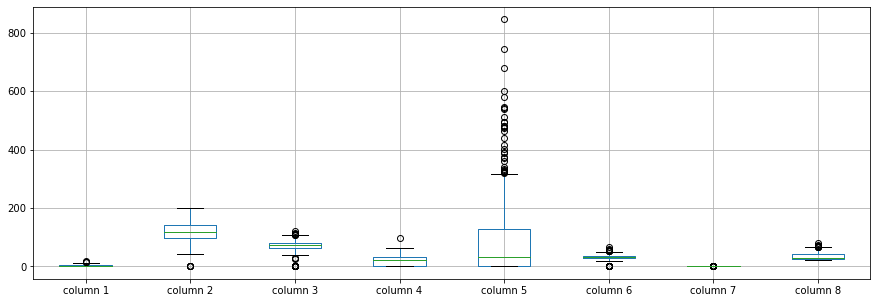

In [6]:
df.boxplot(return_type='axes', figsize=(15,5))

In [7]:
df.mean()

column 1      3.840523
column 2    120.894531
column 3     69.156168
column 4     20.583007
column 5     79.794974
column 6     32.011024
column 7      0.471876
column 8     33.244000
dtype: float64

In [8]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.126869,0.149529,-0.078106,-0.070623,0.013437,-0.031545,0.547125
column 2,0.126869,1.000000,0.149504,0.056260,0.334349,0.222734,0.137337,0.254177
column 3,0.149529,0.149504,1.000000,0.201067,0.073606,0.267439,0.040817,0.240225
column 4,-0.078106,0.056260,0.201067,1.000000,0.429228,0.389879,0.182101,-0.113490
column 5,-0.070623,0.334349,0.073606,0.429228,1.000000,0.204419,0.181706,-0.060104
column 6,0.013437,0.222734,0.267439,0.389879,0.204419,1.000000,0.138530,0.034480
column 7,-0.031545,0.137337,0.040817,0.182101,0.181706,0.138530,1.000000,0.038234
column 8,0.547125,0.254177,0.240225,-0.113490,-0.060104,0.034480,0.038234,1.000000


In [9]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [10]:
imputer = md.Midas(layer_structure = [8,8+76,8+76+76,8+76+76+76,8+76+76+76+76,8+76+76+76+76+76,8+76+76+76+76,8+76+76+76,8+76+76,8+76,8], vae_layer = False, seed = 76)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 422.1115366617839
Epoch: 1 , loss: 423.89497629801434
Epoch: 2 , loss: 423.25549189249676
Epoch: 3 , loss: 415.17093086242676
Epoch: 4 , loss: 396.4324843088786
Epoch: 5 , loss: 389.7911071777344
Epoch: 6 , loss: 383.9357484181722
Epoch: 7 , loss: 375.47468249003094
Epoch: 8 , loss: 372.7529125213623
Epoch: 9 , loss: 366.3397528330485
Epoch: 10 , loss: 354.01613744099933
Epoch: 11 , loss: 347.4750982920329
Epoch: 12 , loss: 335.26769892374676
Epoch: 13 , loss: 328.91592343648273
Epoch: 14 , loss: 319.90441131591797
Epoch: 15 , loss: 313.16068108876544
Epoch: 16 , loss: 311.4553591410319
Epoch: 17 , loss: 296.6705678304036
Epoch: 18 , loss: 300.7309675216675
Epoch: 19 , loss: 289.7629877726237
Epoch: 20 , loss: 294.6942303975423
Epoch: 21 , loss: 283.91158803304035
Epoch: 22 , loss: 289.2928635279338
Epoch: 23 , loss: 278.45840040842694
Epoch: 24 , loss: 277.8136269251506
Epoch: 25 , loss: 275.0753952662

In [11]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [12]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000
column 2    99.000
column 3    84.000
column 4     0.000
column 5     0.000
column 6    35.400
column 7     0.388
column 8    50.000
Name: 21, dtype: float64

In [13]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [14]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
763,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
764,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
765,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
766,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [15]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [16]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [17]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(524.7578365646783, 5776.576248839705)

In [18]:
NRMS=numerator/denominator
NRMS


0.09084236301218776

In [19]:
new_df.iloc[66,:]

column 1      0.000
column 2    109.000
column 3     88.000
column 4     30.000
column 5      0.000
column 6     32.500
column 7      0.855
column 8     38.000
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126,60.0,0.0,0.0,30.1,0.349,47.0


In [21]:
imputations[-1].to_excel("PID_AG_1.xlsx", index=False, header=False)